In [2]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import logistic_regression_util

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### Logistic Regression
- Fundamentals: 
 https://docs.google.com/presentation/d/1AzgB6opDhEuAdBHZS8GRbBV6BtQCqb9JSAElM4-H6nk/edit?usp=sharing
- logistic regression in sklearn

#### Pros

- High interpretabability. It's explainable to others, i.e. it's useful for understanding the influence of several independent variables on a single outcome variable.

- We can choose to ‘snap’ predictions to 0 and 1 via a rule (such as if < .5, 0 else 1) OR we can choose to use the output as is, which is a probability of being class 1.

- It’s a fast model and is a good place to start with a benchmark for comparing with other classification algorithms.

- Very efficient and does not require many computational resources. Runs fast.

- Outputs clear predicted probabilities.

#### Cons

- Assumes all predictors are independent of each other.

- Missing values must be dealt with prior to fitting the model.

- We can’t solve non-linear problems with logistic regression since it’s decision surface is linear.

- Not always as accurate as other classification algorithms.

In [3]:
from pydataset import data

df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# change column names to cleaner look
df.columns = [col.lower().replace('.', '_') for col in df]
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
# get dummies for our species
#we will have 2 different target variables 
# dummies = pd.get_dummies(df['species'], drop_first=True)


dummies = pd.get_dummies(df['species'], drop_first = True)
dummies.head()

,versicolor,virginica
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0


In [6]:
# concat dummies and original df. Drop 'species column'
df = pd.concat([df, dummies], axis =1).drop(columns = ['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
1,5.1,3.5,1.4,0.2,0,0
2,4.9,3.0,1.4,0.2,0,0
3,4.7,3.2,1.3,0.2,0,0
4,4.6,3.1,1.5,0.2,0,0
5,5.0,3.6,1.4,0.2,0,0


### Predict if species is versicolor or not

In [7]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [8]:
train, validate, test = train_validate_test_split(df,
                                                  target = 'versicolor',
                                                  seed=123)

In [9]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
97,5.7,2.9,4.2,1.3,1,0
125,6.7,3.3,5.7,2.1,0,1
87,6.7,3.1,4.7,1.5,1,0
13,4.8,3.0,1.4,0.1,0,0
122,5.6,2.8,4.9,2.0,0,1


In [10]:
train.versicolor.value_counts()
#shows imbalanced dataset

0    56
1    28
Name: versicolor, dtype: int64

In [11]:
# Make new dataframes
#setup X and y 
X_train = train.drop(columns=['versicolor'])
y_train = train.versicolor

X_validate = validate.drop(columns=['versicolor'])
y_validate = validate.versicolor

X_test = test.drop(columns=['versicolor'])
y_test = test.versicolor

In [12]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width,virginica
97,5.7,2.9,4.2,1.3,0
125,6.7,3.3,5.7,2.1,1
87,6.7,3.1,4.7,1.5,0
13,4.8,3.0,1.4,0.1,0
122,5.6,2.8,4.9,2.0,1


In [13]:
X_train.shape, y_train.shape
#1 col on y_train (that's why it doesn't show anything after the comma)

((84, 5), (84,))

# Model 1

In [14]:
# Define the logistic regression model
logit = LogisticRegression(C=1, class_weight={0:1, 1:99},
                           random_state=123)

In [15]:
#  fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

In [16]:
# now use the model to make predictions
y_pred = logit.predict(X_train)

In [17]:
#take a look at predictions
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0], dtype=uint8)

In [22]:
# View raw probabilities (output from the model)


y_pred_proba = logit.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.00623841, 0.99376159],
       [0.82055049, 0.17944951],
       [0.00639535, 0.99360465],
       [0.60925913, 0.39074087],
       [0.75711245, 0.24288755]])

In [20]:
#or make into a dataframe
y_pred_proba = pd.DataFrame(y_pred_proba)
y_pred_proba.head()

,0,1
0,0.006238,0.993762
1,0.820550,0.179450
2,0.006395,0.993605
3,0.609259,0.390741
4,0.757112,0.242888


In [23]:
#make col names
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['non-versicolor', 'versicolor'])
y_pred_proba.head()

,non-versicolor,versicolor
0,0.006238,0.993762
1,0.820550,0.179450
2,0.006395,0.993605
3,0.609259,0.390741
4,0.757112,0.242888


In [24]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        56
           1       0.88      1.00      0.93        28

    accuracy                           0.95        84
   macro avg       0.94      0.96      0.95        84
weighted avg       0.96      0.95      0.95        84



## Model 2

In [25]:
# from sklearn.linear_model import LogisticRegression model(2)
# Change hyperparameter C = 0.1
#class weight is the same as 1st model
#weighing class 1 (versicolor) more than class 0 (not-versicolor)
# telling alorithm "try to avoid mistakes w/ the higher weight"

logit2 = LogisticRegression(C=.1, class_weight={0:1, 1:99}, random_state=123)


In [26]:
# fit the model
logit2.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 99}, random_state=123)

In [27]:
# make prediction
y_pred2 = logit2.predict(X_train)

In [28]:
#classification report
print(classification_report(y_train, y_pred2))

#shows accuracy has dropped from model 1

              precision    recall  f1-score   support

           0       1.00      0.12      0.22        56
           1       0.36      1.00      0.53        28

    accuracy                           0.42        84
   macro avg       0.68      0.56      0.38        84
weighted avg       0.79      0.42      0.33        84



## Evaluate Model 1 and 2 performance on 'Validate'

In [29]:
# Make prediction for validate dataset

y_pred_validate = logit.predict(X_validate) #model 1 predictions
y_pred_validate2 = logit2.predict(X_validate) #model 2 predictions

In [32]:
print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

print(confusion_matrix(y_validate, y_pred_validate))

print(classification_report(y_validate, y_pred_validate))

print('------------------------------------------------------')

print("Model 2: solver = lbfgs, c = .1")

print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))

print(confusion_matrix(y_validate, y_pred_validate2))

print(classification_report(y_validate, y_pred_validate2))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.94
[[22  2]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.86      1.00      0.92        12

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.95        36

------------------------------------------------------
Model 2: solver = lbfgs, c = .1
Accuracy: 0.33
[[ 0 24]
 [ 0 12]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.33      1.00      0.50        12

    accuracy                           0.33        36
   macro avg       0.17      0.50      0.25        36
weighted avg       0.11      0.33      0.17        36



## Select Model for evaluation on  'test'

- Model 1 does not seem overfitted/underfitted.
- Select Model 1 for evaluation on 'test' dataset


In [33]:
# Make prediction on X_test using model 1
y_pred_test = logit.predict(X_test)

In [34]:
# print classification report
print(classification_report(y_test, y_pred_test))

#dropped from validate's accuracy, but is still fairly high

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.71      1.00      0.83        10

    accuracy                           0.87        30
   macro avg       0.86      0.90      0.86        30
weighted avg       0.90      0.87      0.87        30



#### Regularization:
- keep model simple
- avoid overfitting
- L1 - Lasso
- L2 - Ridge

#### C = Inverse of regularization
- lower C - higher regularization
- lower C discourages learning more complex model
- minimizes overfitting

## Interpreting model coefficients

In [35]:
# look at model 1 coefficents and intercept
 
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.42681384 -2.98522269  1.96274678  0.08740801 -7.98399654]]
Intercept: 
 [7.80358914]


In [36]:
# look at model 1 coefficents only
logit.coef_[0]

#match train.head col names
#these coefficients are log r's

array([-0.42681384, -2.98522269,  1.96274678,  0.08740801, -7.98399654])

#### Logistic Regression basics:

log(odds) = log(p/(1-p)) = $intercept$ + ($\beta_1$ * variable1) + ($\beta_2$ * variable2) + ($\beta_3$ * variable3)

In [40]:
# Make a dataframe of coefficients and feature names

log_coeffs =pd.DataFrame(logit.coef_[0], 
                         index = X_train.columns, 
                         columns = ["coeffs"]).sort_values(by = "coeffs", ascending=True)

log_coeffs


,coeffs
virginica,-7.983997
sepal_width,-2.985223
sepal_length,-0.426814
petal_width,0.087408
petal_length,1.962747


In [41]:
# convert from log odds to odds (exponentiate)
odds = np.exp(log_coeffs)
odds

,coeffs
virginica,0.000341
sepal_width,0.050528
sepal_length,0.652585
petal_width,1.091342
petal_length,7.118854


- For every one unit increase in petal_length, the odds that observation is versicolor('1) is 7.1 times higher than the odds that observation is not-versicolor('0), assuming all other things remain the same.
- shows that odds of petal width are close to 1, so model tells us that petal width is not a big driver

### Choosing different probability threshold:



Default threshold value is 0.5   
We choose a **threshold t** such that if $P(y = 1) > t$, we predict 1, else we predict 0.

In [44]:
t = 0.3
y_pred1 = (y_pred_proba > t).astype(int)
y_pred1.head()

,non-versicolor,versicolor
0,0,1
1,1,0
2,0,1
3,1,1
4,1,0


In [47]:
# classification report for threshold = t
print(classification_report(y_train, y_pred1.versicolor))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80        56
           1       0.60      1.00      0.75        28

    accuracy                           0.77        84
   macro avg       0.80      0.83      0.77        84
weighted avg       0.87      0.77      0.78        84



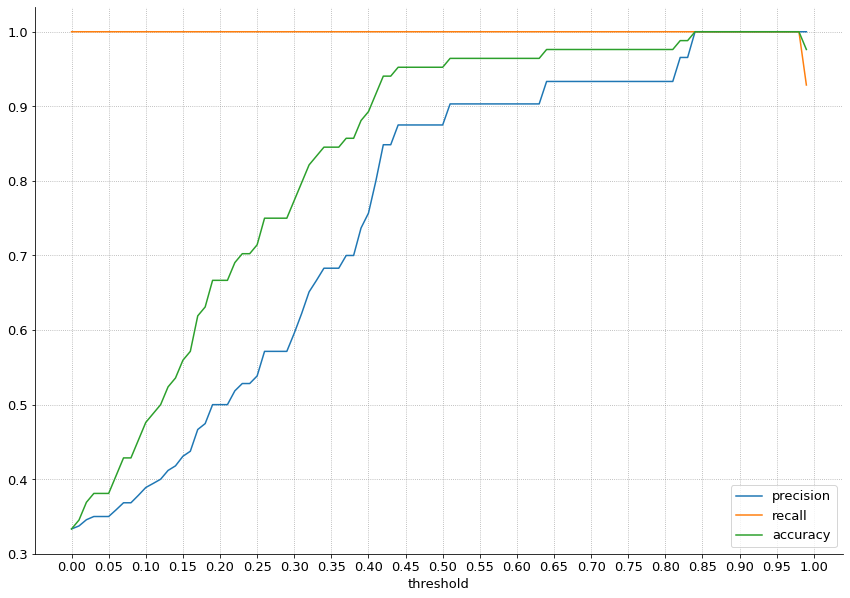

In [48]:
# plot metrics vs thresholds
#using util.py file
logistic_regression_util.plot_metrics_by_thresholds(y_train, y_pred_proba.versicolor)